In [139]:
import pandas as pd
import numpy as np

In [140]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [141]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [142]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


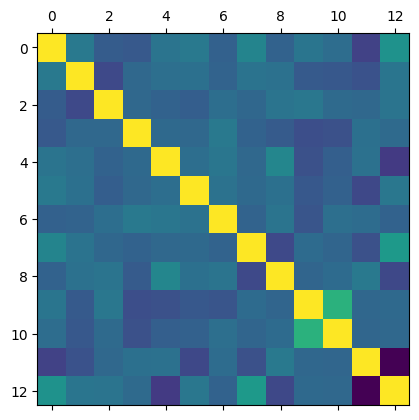

In [143]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 15))
plt.matshow(df.corr())
plt.show()

In [144]:
import seaborn as sns

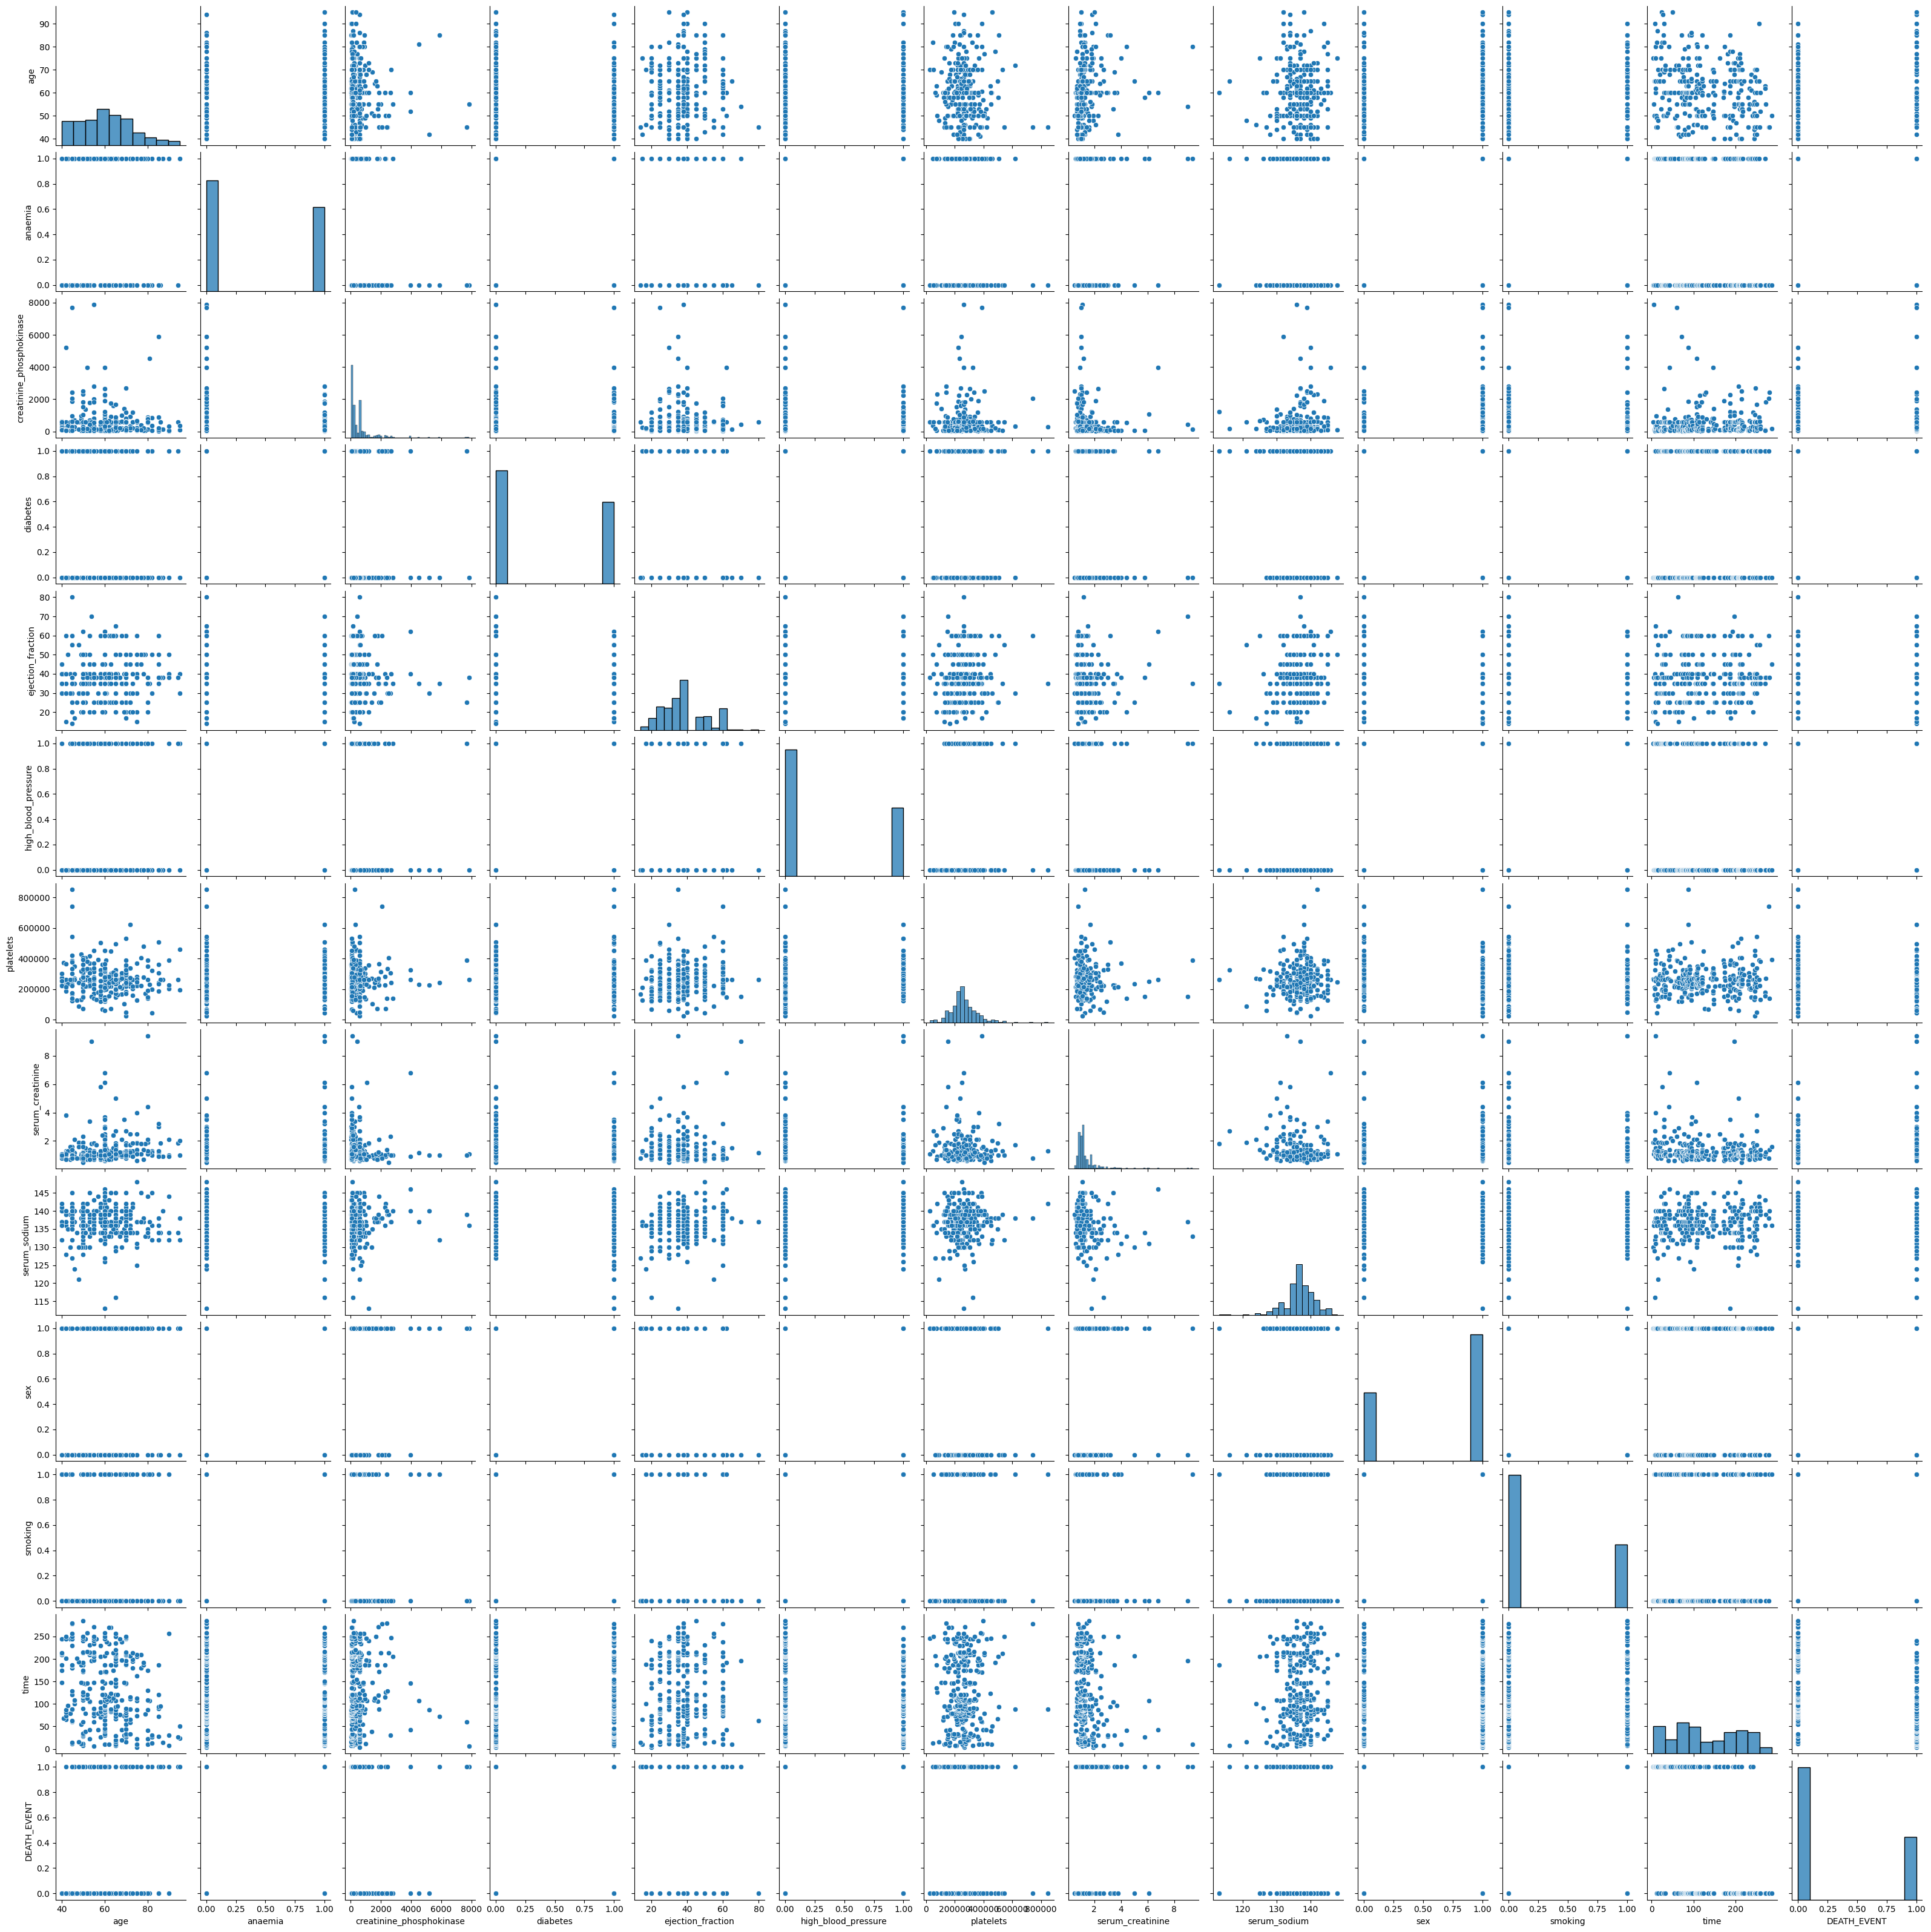

In [145]:
sns.pairplot(df)

<Axes: >

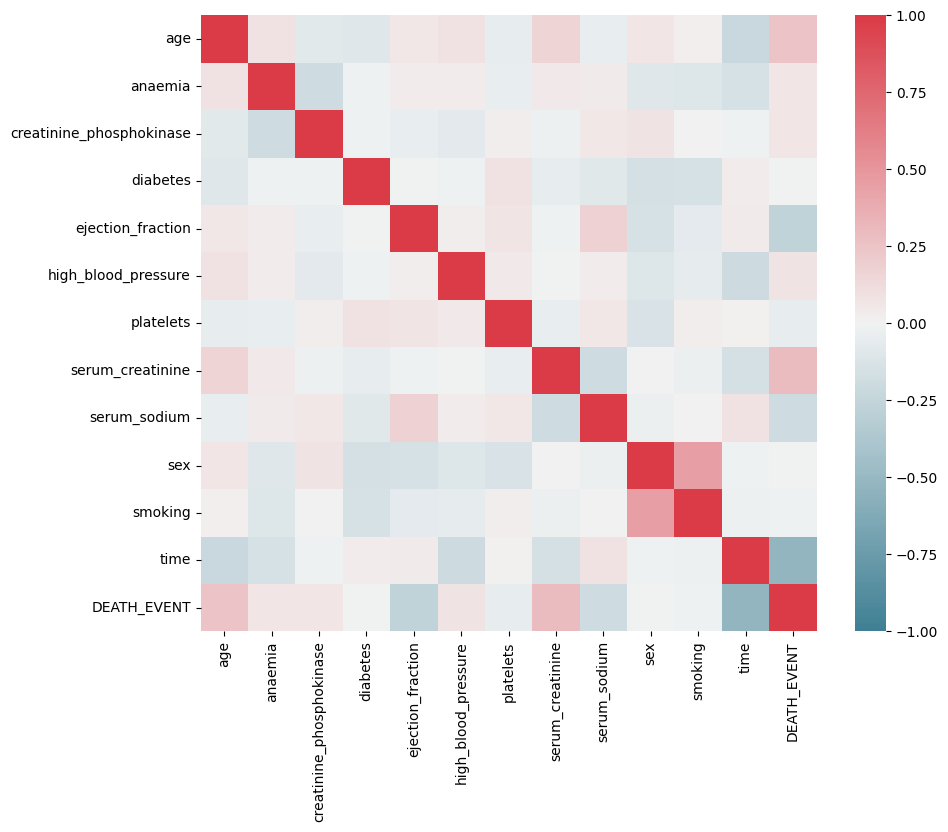

In [146]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [147]:
X_label = df.drop('DEATH_EVENT', axis=1)
y_label = df['DEATH_EVENT']

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 42)

In [167]:
print(X_test)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
281  70.0        0                       582         0                 40   
265  50.0        1                       298         0                 35   
164  45.0        0                      2442         1                 30   
9    80.0        1                       123         0                 35   
77   42.0        0                       102         1                 40   
278  50.0        1                      1051         1                 30   
93   60.0        1                       154         0                 25   
109  45.0        0                       292         1                 35   
5    90.0        1                        47         0                 40   
173  50.0        1                       115         0                 20   
97   70.0        1                        59         0                 60   
195  77.0        1                       418         0                 45   

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

lr1 = LogisticRegression(C=1.0, max_iter = 100)
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8


In [151]:
from sklearn.ensemble import RandomForestClassifier

cl1 = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = 6, min_samples_split=2, min_samples_leaf=1, bootstrap= True)
cl1.fit(X_train, y_train)

y_pred1 = cl1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(accuracy1)

0.75


In [152]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion= 'gini', splitter = 'best', max_depth = None, min_samples_split=10, min_samples_leaf=1, random_state=42)
dt1.fit(X_train, y_train)

y_pred2 = dt1.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(accuracy2)

0.7166666666666667


In [153]:
import xgboost as xgb
xg1 = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, booster='gbtree', n_jobs=1, gamma=0)
xg1.fit(X_train, y_train)

y_pred3 = xg1.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)

0.7333333333333333


In [156]:
from sklearn.model_selection import GridSearchCV

param_grid_lr1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

param_grid_cl1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

param_grid_dt1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_xg1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_lr1 = GridSearchCV(estimator=lr1, param_grid=param_grid_lr1, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_cl1 = GridSearchCV(estimator=cl1, param_grid=param_grid_cl1, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_dt1 = GridSearchCV(estimator=dt1, param_grid=param_grid_dt1, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg1 = GridSearchCV(estimator=xg1, param_grid=param_grid_xg1, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search_lr1.fit(X_train, y_train)
print(f'Logistic Regression: {grid_search_lr1.best_params_}')

grid_search_cl1.fit(X_train, y_train)
print(f'Random Forest: {grid_search_cl1.best_params_}')

grid_search_dt1.fit(X_train, y_train)
print(f'Decision Tree: {grid_search_dt1.best_params_}')

grid_search_xg1.fit(X_train, y_train)
print(f'XGBoost: {grid_search_xg1.best_params_}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Logistic Regression: {'C': 1}
Random Forest: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200}
Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [157]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = lr1.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f'Logistic Regression AUC-ROC: {auc_lr:.2f}')


y_pred_proba_rf = cl1.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'Random Forest AUC-ROC: {auc_rf:.2f}')


y_pred_proba_dt = dt1.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f'Decision Tree AUC-ROC: {auc_dt:.2f}')


y_pred_proba_xgb = xg1.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'XGBoost AUC-ROC: {auc_xgb:.2f}')


Logistic Regression AUC-ROC: 0.83
Random Forest AUC-ROC: 0.85
Decision Tree AUC-ROC: 0.74
XGBoost AUC-ROC: 0.87


In [158]:
!pip install eli5

In [159]:
import eli5

eli5.show_weights(lr1, feature_names=X_test.columns.tolist())

Weight?,Feature
+0.059,age
+0.008,serum_creatinine
+0.003,serum_sodium
+0.001,diabetes
+0.000,<BIAS>
+0.000,creatinine_phosphokinase
-0.000,platelets
-0.000,anaemia
-0.000,smoking
-0.000,high_blood_pressure


In [160]:
# For a negative label
eli5.show_prediction(lr1, X_test.iloc[4], show_feature_values=True)

# For a positive label
eli5.show_prediction(lr1, X_test.iloc[0], show_feature_values=True)

In [161]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(dt1, random_state=42).fit(X_train, y_train)

# Display the feature importances
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.2226 ± 0.0415,time
0.1381 ± 0.0313,serum_creatinine
0.0360 ± 0.0146,ejection_fraction
0.0343 ± 0.0227,creatinine_phosphokinase
0.0285 ± 0.0162,platelets
0.0251 ± 0.0140,serum_sodium
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,high_blood_pressure
0 ± 0.0000,diabetes


In [162]:
!pip install lime
!pip install shap

In [163]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.tolist(), mode='classification', categorical_features=X_train.select_dtypes(include=['object']).columns.tolist())

rf1_pred = cl1.predict_proba(X_test).flatten()
rf1_exp = explainer.explain_instance(X_test.iloc[0], cl1.predict_proba, num_features=len(X_test.columns.tolist()))


xg1_pred = xg1.predict_proba(X_test).flatten()
xg1_exp = explainer.explain_instance(X_test.iloc[0], xg1.predict_proba, num_features=len(X_test.columns.tolist()))

# Accessing the coefficients, intercept, and R2
rf1_coefficients = rf1_exp.local_exp[1]
rf1_intercept = rf1_exp.intercept[1]
rf1_score = rf1_exp.score


xg1_coefficients = xg1_exp.local_exp[1]
xg1_intercept = xg1_exp.intercept[1]
xg1_score = xg1_exp.score

# Display the explanations
print('Random Forest Model Explanation:')
print('Coefficients:', rf1_coefficients)
print('Intercept:', rf1_intercept)
print('R2:', rf1_score)

print('\nXGBoost Model Explanation:')
print('Coefficients:', xg1_coefficients)
print('Intercept:', xg1_intercept)
print('R2:', xg1_score)


Random Forest Model Explanation:
Coefficients: [(7, 0.2318186209816913), (11, -0.17086834229648015), (0, 0.08070594242157499), (6, 0.03926823379386677), (4, -0.03741894541247712), (8, -0.02462047014663215), (2, 0.019706389421567636), (9, -0.009990020321993375), (5, -0.0029543984754186493), (1, 0.0009478656627472763), (3, -0.0009017370739087748), (10, -0.00031742514172567024)]
Intercept: 0.299722198833972
R2: 0.28166080517615355

XGBoost Model Explanation:
Coefficients: [(11, -0.28739415562624054), (7, 0.2584305959020735), (0, 0.09476107507037533), (4, -0.09154706998378287), (6, 0.07878800214792196), (2, 0.0394639183086343), (9, -0.03561733506260517), (3, 0.00981430987604975), (8, 0.006986207577677101), (10, 0.005379777924789404), (1, -0.0048331935888649225), (5, -0.0020839438533020744)]
Intercept: 0.34253968205555413
R2: 0.2649213332554937


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [164]:
print(X_test.iloc[[0]].shape)

(1, 12)


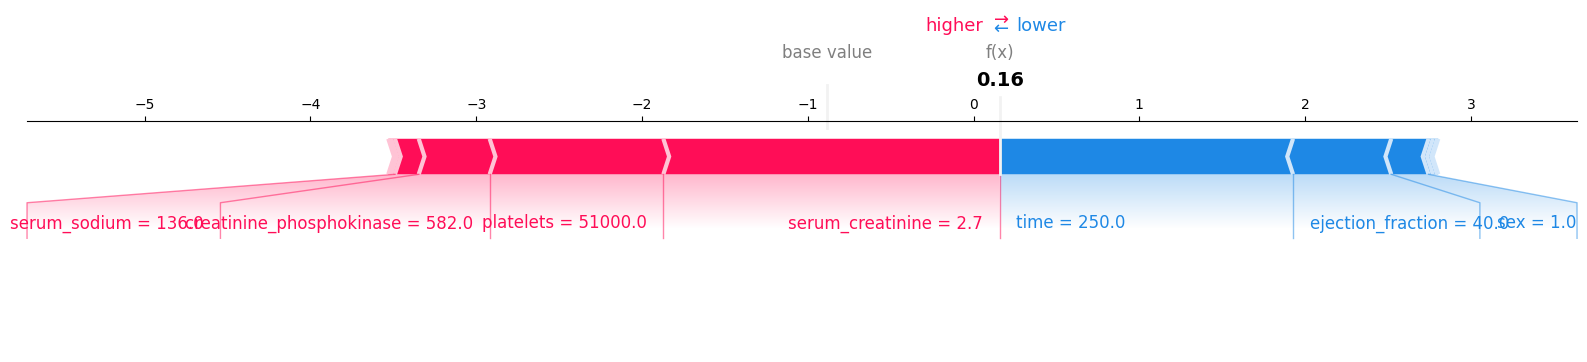

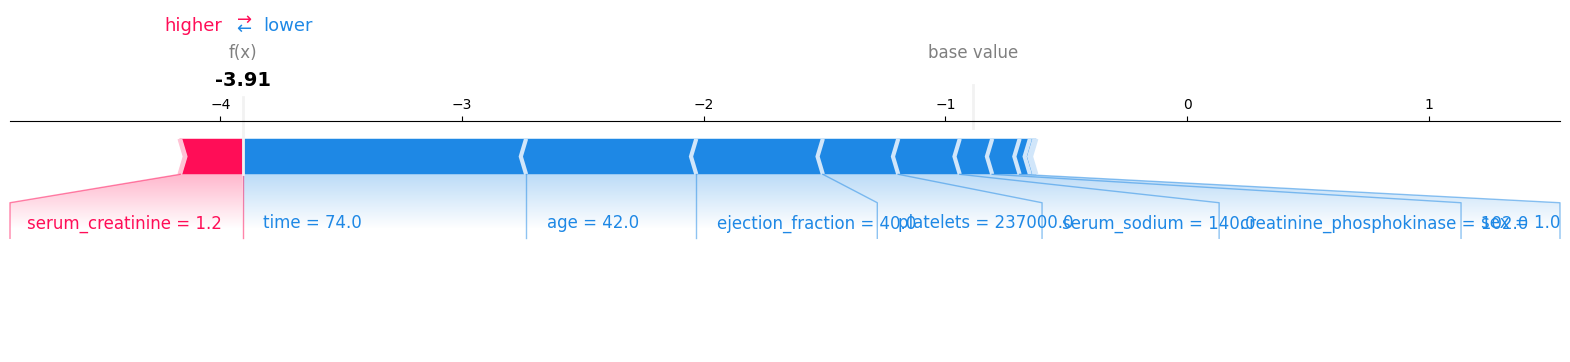

In [165]:
import shap
shap.initjs()


explainer = shap.TreeExplainer(xg1)
shap_values = explainer.shap_values(X_test.iloc[[0]])


shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[[0]], matplotlib=True)

shap_values_negative = explainer.shap_values(X_test.iloc[[4]])
shap.force_plot(explainer.expected_value, shap_values_negative, X_test.iloc[[4]], matplotlib=True)

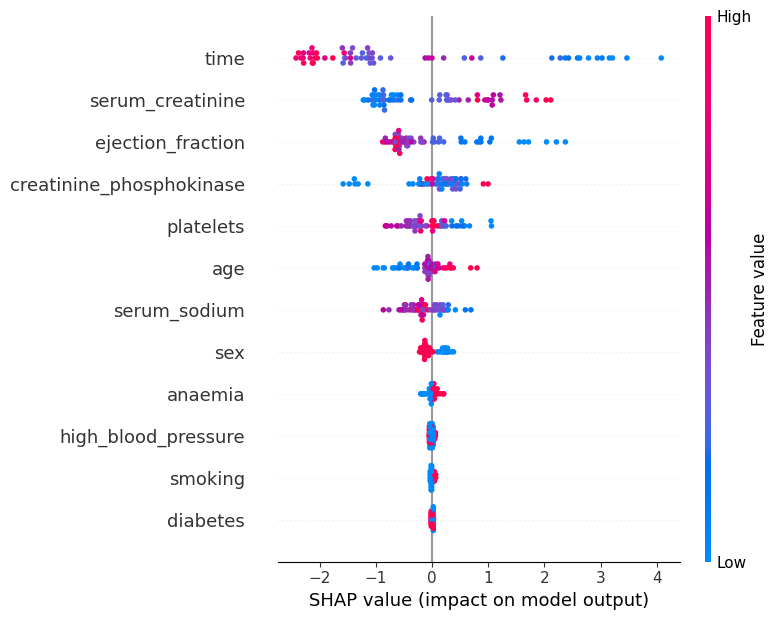

In [171]:
# Create the SHAP explainer
explainer = shap.TreeExplainer(xg1)

shap_values = explainer.shap_values(X_test)

# Plot the feature importance for each class/label
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns.tolist(), class_names=['0', '1'])

In [172]:
neg_r = X_test.iloc[0]
pos_r = X_test.iloc[4]

lr_neg = lr1.predict_proba(neg_r.values.reshape(1,-1))
lr_pos = lr1.predict_proba(pos_r.values.reshape(1,-1))
dt_pos = dt1.predict_proba(pos_r.values.reshape(1,-1))
dt_neg = dt1.predict_proba(neg_r.values.reshape(1,-1))
rf_neg = cl1.predict_proba(neg_r.values.reshape(1,-1))
rf_pos = cl1.predict_proba(pos_r.values.reshape(1,-1))
xgb_neg = xg1.predict_proba(neg_r.values.reshape(1,-1))
xgb_pos = xg1.predict_proba(pos_r.values.reshape(1,-1))



print("Logistic Regression(-ve):", lr_neg)
print("Logistic Regression(+ve):", lr_pos)
print("Decision Tree(-ve):", dt_pos)
print("Decision Tree(+ve):", dt_neg)
print("Random Forest(-ve):", rf_neg)
print("Random Forest(+ve):", rf_pos)
print("XGBoost(-ve):", xgb_neg)
print("XGBoost(+ve):", xgb_pos)

Logistic Regression(-ve): [[0.96150892 0.03849108]]
Logistic Regression(+ve): [[0.82491459 0.17508541]]
Decision Tree(-ve): [[1. 0.]]
Decision Tree(+ve): [[0. 1.]]
Random Forest(-ve): [[0.4842429 0.5157571]]
Random Forest(+ve): [[0.92113357 0.07886643]]
XGBoost(-ve): [[0.46078134 0.53921866]]
XGBoost(+ve): [[0.980314   0.01968598]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does no